In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r'C:\Users\devan\Desktop\CODING\Diwali_Saree_Dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      63 non-null     int64  
 1   CustomerName    63 non-null     object 
 2   Gender          63 non-null     object 
 3   Age             63 non-null     int64  
 4   Marital_Status  63 non-null     object 
 5   State           63 non-null     object 
 6   City            63 non-null     object 
 7   Occupation      63 non-null     object 
 8   Product_Name    63 non-null     object 
 9   Price           63 non-null     int64  
 10  Quantity_Sold   63 non-null     int64  
 11  Discount(%)     63 non-null     int64  
 12  PaymentMode     63 non-null     object 
 13  Date            63 non-null     object 
 14  Total_Amount    63 non-null     float64
 15  Profit          63 non-null     float64
dtypes: float64(2), int64(5), object(9)
memory usage: 8.0+ KB
None


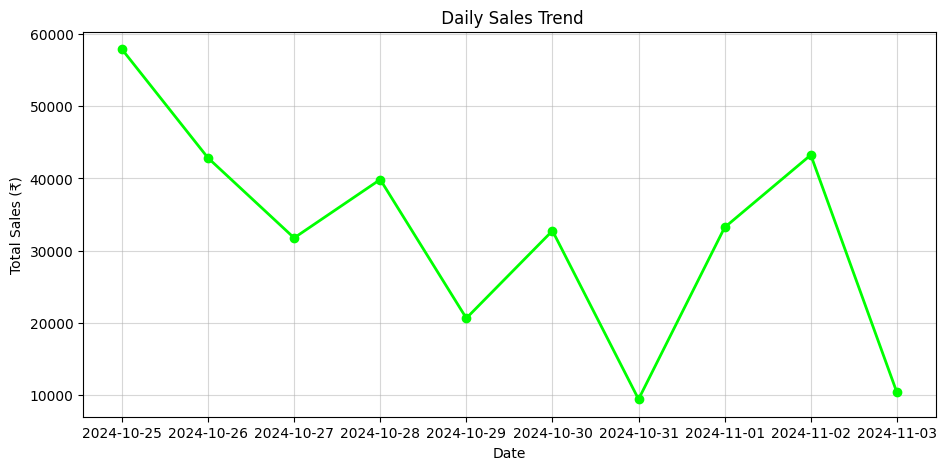

In [10]:
daily_sales = df.groupby('Date')['Total_Amount'].sum()

plt.figure(figsize=(11,5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='lime', linewidth=2)
plt.title(' Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (₹)')
plt.grid(alpha=0.5)
plt.show()


C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


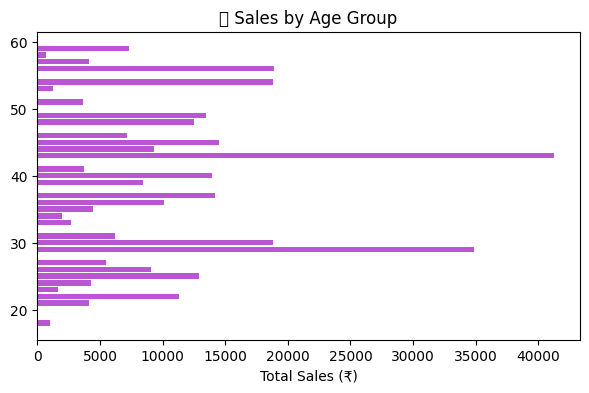

In [11]:
age_group_sales = df.groupby('Age', observed=False)['Total_Amount'].sum().sort_values()

plt.figure(figsize=(7,4))
plt.barh(age_group_sales.index, age_group_sales.values, color='mediumorchid')
plt.title('👥 Sales by Age Group')
plt.xlabel('Total Sales (₹)')
plt.show()


C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128699 (\N{RESTROOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


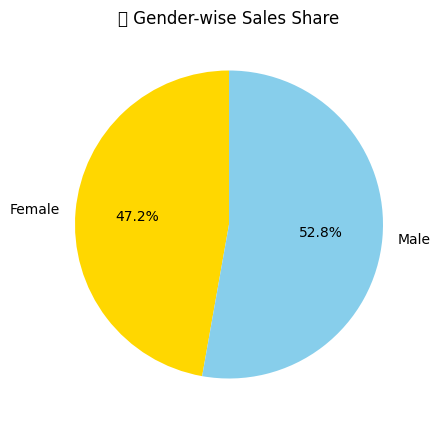

In [12]:
gender_sales = df.groupby('Gender')['Total_Amount'].sum()

plt.figure(figsize=(5,5))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue'])
plt.title('🚻 Gender-wise Sales Share')
plt.show()


C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


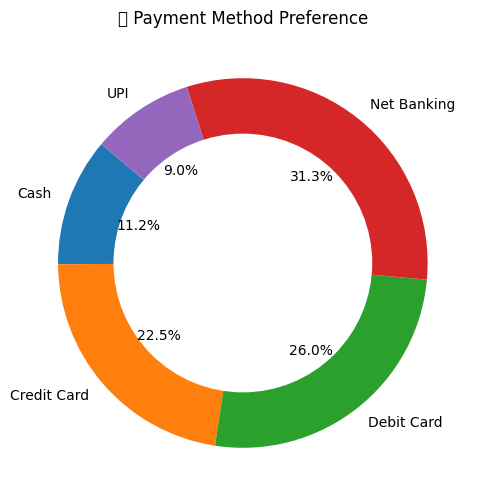

In [13]:
payment_sales = df.groupby('PaymentMode')['Total_Amount'].sum()

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('💳 Payment Method Preference')
plt.show()


C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


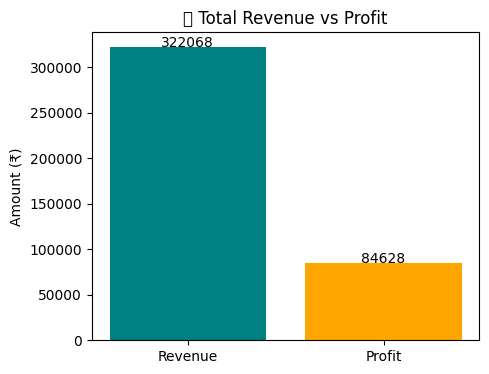

In [14]:
revenue = df['Total_Amount'].sum()
profit = df['Profit'].sum()

plt.figure(figsize=(5,4))
bars = plt.bar(['Revenue', 'Profit'], [revenue, profit], color=['teal', 'orange'])
plt.title('💰 Total Revenue vs Profit')
plt.ylabel('Amount (₹)')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, f"{int(bar.get_height())}", ha='center', fontsize=10)

plt.show()


C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


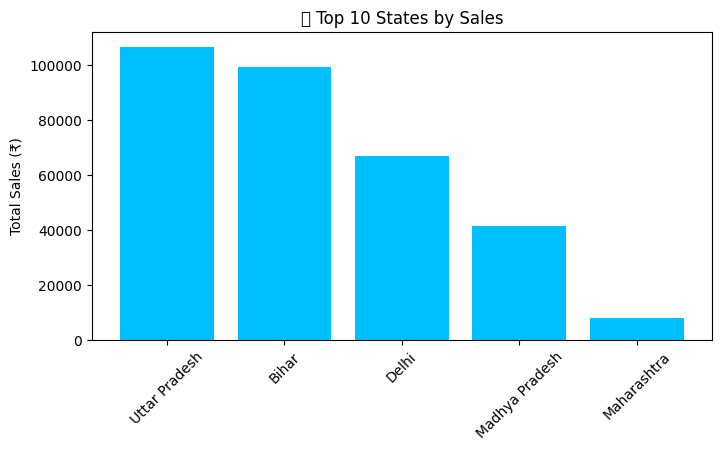

In [15]:
state_sales = df.groupby('State')['Total_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(state_sales.index, state_sales.values, color='deepskyblue')
plt.title('🏙 Top 10 States by Sales')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=45)
plt.show()


Sales on Diwali: 43251.41
Sales on Dhanteras: 9441.52


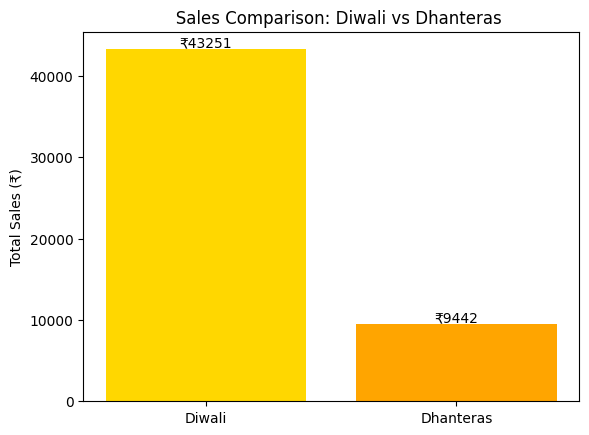

In [16]:
diwali_date = '2024-11-02'
dhanteras_date = '2024-10-31'

# Calculate total sales for both dates
sales_diwali = df[df['Date'] == diwali_date]['Total_Amount'].sum()
sales_dhanteras = df[df['Date'] == dhanteras_date]['Total_Amount'].sum()

# Check if data exists
print("Sales on Diwali:", sales_diwali)
print("Sales on Dhanteras:", sales_dhanteras)

# Plot only if there’s data
fig, ax = plt.subplots()
bars = ax.bar(['Diwali', 'Dhanteras'], [sales_diwali, sales_dhanteras], color=['gold', 'orange'])
ax.bar_label(bars, fmt='₹%.0f')
plt.title('   Sales Comparison: Diwali vs Dhanteras')
plt.ylabel('Total Sales (₹)')
plt.show()